In [83]:
import numpy as np
import scipy as sp
import pandas as pd
import pyam
from matplotlib import pyplot as plt
%matplotlib inline

from fair_scm import *
from fair_inverse_revised import *

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
co2_ems_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2ems.xlsx', encoding='utf-8')
co2_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2rf.xlsx', encoding='utf-8')
total_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_totalrf.xlsx', encoding='utf-8')

# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
two_lower_co2_ems_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_ems_2lower.xlsx', encoding='utf-8')
two_lower_co2_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_forcing_2lower.xlsx', encoding='utf-8')
two_lower_total_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_total_forcing_2lower.xlsx', encoding='utf-8')

# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
two_higher_co2_ems_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_ems_2higher.xlsx', encoding='utf-8')
two_higher_co2_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_forcing_2higher.xlsx', encoding='utf-8')
two_higher_total_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_total_forcing_2higher.xlsx', encoding='utf-8')

# import RCP85 scenario to stitch onto past
RCP85_E = pd.read_csv('./RCP_data/RCP85_EMISSIONS.csv',skiprows=36,index_col=0)
RCP85_RF = pd.read_csv('./RCP_data/RCP85_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP3_E = pd.read_csv('./RCP_data/RCP3PD_EMISSIONS.csv',skiprows=36,index_col=0)
RCP3_RF = pd.read_csv('./RCP_data/RCP3PD_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP45_E = pd.read_csv('./RCP_data/RCP45_EMISSIONS.csv',skiprows=36,index_col=0)
RCP45_RF = pd.read_csv('./RCP_data/RCP45_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP6_E = pd.read_csv('./RCP_data/RCP6_EMISSIONS.csv',skiprows=36,index_col=0)
RCP6_RF = pd.read_csv('./RCP_data/RCP6_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2ems.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2rf.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_totalrf.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_ems_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_forcing_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_total_forcing_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_ems_2higher.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_forcing_2higher.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_total_forcing_2higher.xlsx`


invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c


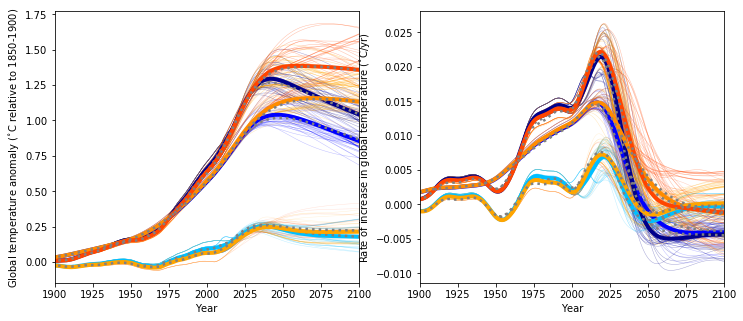

In [30]:
TCRE_val = 1.4

TCR_val = 1.6
ECS_val = 2.75
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100
epsilon = (ECS_val - TCR_val)/(TCR_val*d_array[0])
gamma = (1 - np.exp(-epsilon*H))/(epsilon*H)

# magicc like AGWP value
r0 = 32.4 # 33.6
rC = 0.019 # 0.0206
rT = 4.165 # 4.635

sum_co2_ems = np.zeros(2101-1765)
sum_nonco2_ems = np.zeros(2101-1765)
sum_total_ems = np.zeros(2101-1765)
sum_co2_T = np.zeros(2101-1765)
sum_nonco2_T = np.zeros(2101-1765)
sum_total_T = np.zeros(2101-1765)
count = 0


fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_xlim(1900,2100)
ax[1].set_xlim(1900,2100)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Global temperature anomaly ($^{\circ}$C relative to 1850-1900)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Rate of increase in global temperature ($^{\circ}$C/yr)')

for i in range(0,len(list(co2_ems_df.models()))):
    for j in range(0,len(list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios()))):
        count += 1
        single_ems = co2_ems_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems += single_ems.values
        
        single_totalrf = total_RF_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = co2_RF_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems += E_nonco2
        sum_co2_T += T_co2_run
        sum_nonco2_T += T_non_co2_run
        sum_total_T += T_run
        sum_total_ems += E_total
        
#         T_back, E_total = fair_scm_emsback(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values, TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
#         E_nonco2 = E_total - single_ems.values
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='darkblue', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='blue', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='deepskyblue', alpha=0.25, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='darkblue', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='blue', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='deepskyblue', alpha=0.25, linewidth=0.5)

#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(single_ems.values)-np.mean(np.cumsum(single_ems.values)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(single_ems.values, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_nonco2)-np.mean(np.cumsum(E_nonco2)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_nonco2, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_total)-np.mean(np.cumsum(E_total)[1850-1765:1901-1765])), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_total, 5, mode='nearest'), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
        







# same for 2 degree scenarios

sum_co2_ems_2 = np.zeros(2101-1765)
sum_nonco2_ems_2 = np.zeros(2101-1765)
sum_total_ems_2 = np.zeros(2101-1765)
sum_co2_T_2 = np.zeros(2101-1765)
sum_nonco2_T_2 = np.zeros(2101-1765)
sum_total_T_2 = np.zeros(2101-1765)
count_2 = 0

for i in range(0,len(list(two_lower_co2_ems_df.models()))):
    for j in range(0,len(list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios()))):
        count_2 += 1
        single_ems = two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems_2 += single_ems.values
        
        single_totalrf = two_lower_total_RF_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = two_lower_co2_RF_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems_2 += E_nonco2
        sum_co2_T_2 += T_co2_run
        sum_nonco2_T_2 += T_non_co2_run
        sum_total_T_2 += T_run
        sum_total_ems_2 += E_total
        
#         T_back, E_total = fair_scm_emsback(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values, TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
#         E_nonco2 = E_total - single_ems.values
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='orange', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='orange', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='orange', alpha=0.15, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='orange', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='orange', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='orange', alpha=0.15, linewidth=0.5)

#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(single_ems.values)-np.mean(np.cumsum(single_ems.values)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(single_ems.values, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_nonco2)-np.mean(np.cumsum(E_nonco2)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_nonco2, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_total)-np.mean(np.cumsum(E_total)[1850-1765:1901-1765])), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_total, 5, mode='nearest'), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
        

for i in range(0,len(list(two_higher_co2_ems_df.models()))):
    for j in range(0,len(list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios()))):
        count_2 += 1
        single_ems = two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems_2 += single_ems.values
        
        single_totalrf = two_higher_total_RF_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = two_higher_co2_RF_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems_2 += E_nonco2
        sum_co2_T_2 += T_co2_run
        sum_nonco2_T_2 += T_non_co2_run
        sum_total_T_2 += T_run
        sum_total_ems_2 += E_total
        
#         T_back, E_total = fair_scm_emsback(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values, TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
#         E_nonco2 = E_total - single_ems.values
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='orangered', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='orangered', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='orangered', alpha=0.15, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='orangered', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='orangered', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='orangered', alpha=0.15, linewidth=0.5)

#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(single_ems.values)-np.mean(np.cumsum(single_ems.values)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(single_ems.values, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_nonco2)-np.mean(np.cumsum(E_nonco2)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_nonco2, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_total)-np.mean(np.cumsum(E_total)[1850-1765:1901-1765])), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_total, 5, mode='nearest'), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
            
    
    
av_nonco2_T = sum_nonco2_T / count
av_nonco2_ems = sum_nonco2_ems / count

av_co2_T = sum_co2_T / count
av_co2_ems = sum_co2_ems / count

av_total_T = sum_total_T / count
av_total_ems = sum_total_ems / count

ax[0].plot(np.arange(1765,2101), av_co2_T - np.mean(av_co2_T[1850-1765:1901-1765]), color='blue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_nonco2_T - np.mean(av_nonco2_T[1850-1765:1901-1765]), color='deepskyblue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_total_T - np.mean(av_total_T[1850-1765:1901-1765]), color='darkblue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_co2_ems) - np.mean(np.cumsum(av_co2_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_nonco2_ems) - np.mean(np.cumsum(av_nonco2_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_total_ems) - np.mean(np.cumsum(av_total_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)

ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_co2_T), 5, mode='nearest'), color='blue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_nonco2_T), 5, mode='nearest'), color='deepskyblue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_total_T), 5, mode='nearest'), color='darkblue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_co2_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_nonco2_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_total_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)




    
av_nonco2_T_2 = sum_nonco2_T_2 / count_2
av_nonco2_ems_2 = sum_nonco2_ems_2 / count_2

av_co2_T_2 = sum_co2_T_2 / count_2
av_co2_ems_2 = sum_co2_ems_2 / count_2

av_total_T_2 = sum_total_T_2 / count_2
av_total_ems_2 = sum_total_ems_2 / count_2

ax[0].plot(np.arange(1765,2101), av_co2_T_2 - np.mean(av_co2_T_2[1850-1765:1901-1765]), color='darkorange', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_nonco2_T_2 - np.mean(av_nonco2_T_2[1850-1765:1901-1765]), color='orange', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_total_T_2 - np.mean(av_total_T_2[1850-1765:1901-1765]), color='orangered', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_co2_ems_2) - np.mean(np.cumsum(av_co2_ems_2)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_nonco2_ems_2) - np.mean(np.cumsum(av_nonco2_ems_2)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_total_ems_2) - np.mean(np.cumsum(av_total_ems_2)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)

ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_co2_T_2), 5, mode='nearest'), color='darkorange', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_nonco2_T_2), 5, mode='nearest'), color='orange', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_total_T_2), 5, mode='nearest'), color='orangered', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_co2_ems_2, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_nonco2_ems_2, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_total_ems_2, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)



invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c


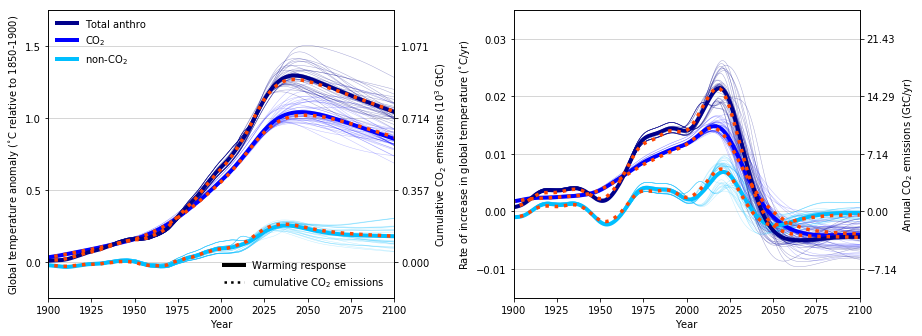

In [94]:
TCRE_val = 1.4

TCR_val = 1.6
ECS_val = 2.75
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100
epsilon = (ECS_val - TCR_val)/(TCR_val*d_array[0])
gamma = (1 - np.exp(-epsilon*H))/(epsilon*H)

# magicc like AGWP value
r0 = 32.4 # 33.6
rC = 0.019 # 0.0206
rT = 4.165 # 4.635

sum_co2_ems = np.zeros(2101-1765)
sum_nonco2_ems = np.zeros(2101-1765)
sum_total_ems = np.zeros(2101-1765)
sum_co2_T = np.zeros(2101-1765)
sum_nonco2_T = np.zeros(2101-1765)
sum_total_T = np.zeros(2101-1765)
count = 0


fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_xlim(1900,2100)
ax[1].set_xlim(1900,2100)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Global temperature anomaly ($^{\circ}$C relative to 1850-1900)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Rate of increase in global temperature ($^{\circ}$C/yr)')
ax[0].set_yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax[0].yaxis.grid(True, linestyle='-', color='black', alpha=0.2)
ax[1].set_yticks([-0.01,0.00,0.01,0.02,0.03,0.04])
ax[1].yaxis.grid(True, linestyle='-', color='black', alpha=0.2)
ax[1].set_ylim(-0.015,0.035)
ax[0].set_ylim(-0.25,1.75)
ax1 = ax[0].twinx()
ax1.set_ylim(-0.25/TCRE_val, 1.75/TCRE_val)
ax1.set_yticks([0.0/TCRE_val,0.5/TCRE_val,1.0/TCRE_val,1.5/TCRE_val])
ax2 = ax[1].twinx()
ax2.set_ylim(-0.015*1000/TCRE_val, 0.035*1000/TCRE_val)
ax2.set_yticks([-0.01*1000/TCRE_val,0.00*1000/TCRE_val,0.01*1000/TCRE_val,0.02*1000/TCRE_val,0.03*1000/TCRE_val])
plt.subplots_adjust(bottom=0.1, right=0.88, top=0.9)
box = ax[0].get_position()
box.x0 = box.x0 - 0.05
box.x1 = box.x1 - 0.05
ax[0].set_position(box)
ax1.set_ylabel('Cumulative CO$_2$ emissions (10$^3$ GtC)')
ax2.set_ylabel('Annual CO$_2$ emissions (GtC/yr)')

for i in range(0,len(list(co2_ems_df.models()))):
    for j in range(0,len(list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios()))):
        count += 1
        single_ems = co2_ems_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems += single_ems.values
        
        single_totalrf = total_RF_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = co2_RF_df.filter(model=list(co2_ems_df.models())[i], scenario=list(co2_ems_df.filter(model=list(co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems += E_nonco2
        sum_co2_T += T_co2_run
        sum_nonco2_T += T_non_co2_run
        sum_total_T += T_run
        sum_total_ems += E_total
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='darkblue', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='blue', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='deepskyblue', alpha=0.25, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='darkblue', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='blue', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='deepskyblue', alpha=0.25, linewidth=0.5)

    
av_nonco2_T = sum_nonco2_T / count
av_nonco2_ems = sum_nonco2_ems / count

av_co2_T = sum_co2_T / count
av_co2_ems = sum_co2_ems / count

av_total_T = sum_total_T / count
av_total_ems = sum_total_ems / count

ax[0].plot(np.arange(1765,2101), av_co2_T - np.mean(av_co2_T[1850-1765:1901-1765]), color='blue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_nonco2_T - np.mean(av_nonco2_T[1850-1765:1901-1765]), color='deepskyblue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_total_T - np.mean(av_total_T[1850-1765:1901-1765]), color='darkblue', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_co2_ems) - np.mean(np.cumsum(av_co2_ems)[1850-1765:1901-1765])), color='orangered', linestyle=':', linewidth=3.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_nonco2_ems) - np.mean(np.cumsum(av_nonco2_ems)[1850-1765:1901-1765])), color='orangered', linestyle=':', linewidth=3.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_total_ems) - np.mean(np.cumsum(av_total_ems)[1850-1765:1901-1765])), color='orangered', linestyle=':', linewidth=3.5)

ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_co2_T), 5, mode='nearest'), color='blue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_nonco2_T), 5, mode='nearest'), color='deepskyblue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_total_T), 5, mode='nearest'), color='darkblue', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_co2_ems, 5, mode='nearest'), color='orangered', linestyle=':', linewidth=3.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_nonco2_ems, 5, mode='nearest'), color='orangered', linestyle=':', linewidth=3.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_total_ems, 5, mode='nearest'), color='orangered', linestyle=':', linewidth=3.5)




legend_elements = [Line2D([0], [0], color='darkblue', lw=4, label='Total anthro'),
                  Line2D([0], [0], color='blue', lw=4, label='CO$_2$'),
                  Line2D([0], [0], color='deepskyblue', lw=4, label='non-CO$_2$')]
ax[0].legend(handles=legend_elements, loc='upper left', edgecolor='w', framealpha=0.0)

legend_elements2 = [Line2D([0], [0], color='black', lw=4, label='Warming response'),
                  Line2D([0], [0], color='black', linestyle=':', lw=2.5, label='cumulative CO$_2$ emissions')]
ax1.legend(handles=legend_elements2, loc='lower right', edgecolor='w', framealpha=0.0)





# fig.savefig('15_compatible_scensTCR1_6.pdf', dpi=300)

invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c


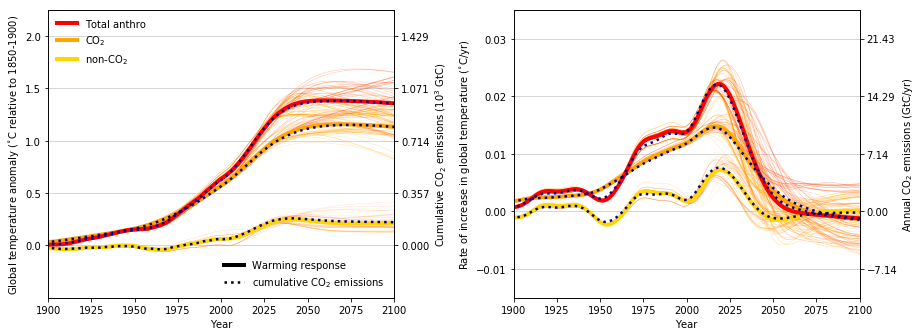

In [93]:
TCRE_val = 1.4

TCR_val = 1.6
ECS_val = 2.75
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100
epsilon = (ECS_val - TCR_val)/(TCR_val*d_array[0])
gamma = (1 - np.exp(-epsilon*H))/(epsilon*H)

# magicc like AGWP value
r0 = 32.4 # 33.6
rC = 0.019 # 0.0206
rT = 4.165 # 4.635

sum_co2_ems = np.zeros(2101-1765)
sum_nonco2_ems = np.zeros(2101-1765)
sum_total_ems = np.zeros(2101-1765)
sum_co2_T = np.zeros(2101-1765)
sum_nonco2_T = np.zeros(2101-1765)
sum_total_T = np.zeros(2101-1765)
count = 0


fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_xlim(1900,2100)
ax[1].set_xlim(1900,2100)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Global temperature anomaly ($^{\circ}$C relative to 1850-1900)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Rate of increase in global temperature ($^{\circ}$C/yr)')
ax[0].set_yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax[0].yaxis.grid(True, linestyle='-', color='black', alpha=0.2)
ax[1].set_yticks([-0.01,0.00,0.01,0.02,0.03,0.04])
ax[1].yaxis.grid(True, linestyle='-', color='black', alpha=0.2)
ax[1].set_ylim(-0.015,0.035)
ax[0].set_ylim(-0.5,2.25)
ax1 = ax[0].twinx()
ax1.set_ylim(-0.5/TCRE_val, 2.25/TCRE_val)
ax1.set_yticks([0.0/TCRE_val,0.5/TCRE_val,1.0/TCRE_val,1.5/TCRE_val,2.0/TCRE_val])
ax2 = ax[1].twinx()
ax2.set_ylim(-0.015*1000/TCRE_val, 0.035*1000/TCRE_val)
ax2.set_yticks([-0.01*1000/TCRE_val,0.00*1000/TCRE_val,0.01*1000/TCRE_val,0.02*1000/TCRE_val,0.03*1000/TCRE_val])
plt.subplots_adjust(bottom=0.1, right=0.88, top=0.9)
box = ax[0].get_position()
box.x0 = box.x0 - 0.05
box.x1 = box.x1 - 0.05
ax[0].set_position(box)
ax1.set_ylabel('Cumulative CO$_2$ emissions (10$^3$ GtC)')
ax2.set_ylabel('Annual CO$_2$ emissions (GtC/yr)')




# same for 2 degree scenarios

sum_co2_ems_2 = np.zeros(2101-1765)
sum_nonco2_ems_2 = np.zeros(2101-1765)
sum_total_ems_2 = np.zeros(2101-1765)
sum_co2_T_2 = np.zeros(2101-1765)
sum_nonco2_T_2 = np.zeros(2101-1765)
sum_total_T_2 = np.zeros(2101-1765)
count_2 = 0

for i in range(0,len(list(two_lower_co2_ems_df.models()))):
    for j in range(0,len(list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios()))):
        count_2 += 1
        single_ems = two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems_2 += single_ems.values
        
        single_totalrf = two_lower_total_RF_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = two_lower_co2_RF_df.filter(model=list(two_lower_co2_ems_df.models())[i], scenario=list(two_lower_co2_ems_df.filter(model=list(two_lower_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems_2 += E_nonco2
        sum_co2_T_2 += T_co2_run
        sum_nonco2_T_2 += T_non_co2_run
        sum_total_T_2 += T_run
        sum_total_ems_2 += E_total
        
#         T_back, E_total = fair_scm_emsback(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values, TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
#         E_nonco2 = E_total - single_ems.values
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='orange', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='orange', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='orange', alpha=0.15, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='orange', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='orange', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='orange', alpha=0.15, linewidth=0.5)

#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(single_ems.values)-np.mean(np.cumsum(single_ems.values)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(single_ems.values, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_nonco2)-np.mean(np.cumsum(E_nonco2)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_nonco2, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_total)-np.mean(np.cumsum(E_total)[1850-1765:1901-1765])), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_total, 5, mode='nearest'), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
        

for i in range(0,len(list(two_higher_co2_ems_df.models()))):
    for j in range(0,len(list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios()))):
        count_2 += 1
        single_ems = two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year').reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_ems.loc[1765:2005] = (RCP3_E.FossilCO2.loc[:2005] + RCP3_E.OtherCO2.loc[:2005])*single_ems.loc[2005]/(RCP3_E.FossilCO2.loc[2005] + RCP3_E.OtherCO2.loc[2005])
        single_ems.loc[:2100] = single_ems.loc[:2100]*12/44000

        sum_co2_ems_2 += single_ems.values
        
        single_totalrf = two_higher_total_RF_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_totalrf = single_totalrf[single_totalrf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value
        single_totalrf.loc[1765:2005] = RCP3_RF.TOTAL_ANTHRO_RF.loc[:2005]*single_totalrf.loc[2005]/RCP3_RF.TOTAL_ANTHRO_RF.loc[2005]

        single_co2rf = two_higher_co2_RF_df.filter(model=list(two_higher_co2_ems_df.models())[i], scenario=list(two_higher_co2_ems_df.filter(model=list(two_higher_co2_ems_df.models())[i]).scenarios())[j]).as_pandas().set_index('year')
        single_co2rf = single_co2rf[single_co2rf.value.values!=0.0].reindex(range(1765,2101)).interpolate().fillna(value=0.0).value  
        single_co2rf.loc[1765:2005] = RCP3_RF.CO2_RF.loc[:2005]*single_co2rf.loc[2005]/RCP3_RF.CO2_RF.loc[2005]

        single_nonco2rf = single_totalrf - single_co2rf

        C_run, T_run = fair_scm(emissions = single_ems.values, other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_co2_run, T_co2_run = fair_scm(emissions = single_ems.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)
        C_nonco2_run, T_non_co2_run = fair_scm(other_rf=single_nonco2rf.values, tcrecs=np.array([TCR_val, ECS_val]), d=d_array, r0=r0,rC=rC,rT=rT,F_2x=F_2x,C_0=C_0)

        C_total_out = forcing_to_conc(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values)
        E_total, E_out_smooth = conc_to_emissions(C_total_out, T_run, r0=r0,rC=rC,rT=rT)
        E_nonco2 = E_total - single_ems.values
        
        sum_nonco2_ems_2 += E_nonco2
        sum_co2_T_2 += T_co2_run
        sum_nonco2_T_2 += T_non_co2_run
        sum_total_T_2 += T_run
        sum_total_ems_2 += E_total
        
#         T_back, E_total = fair_scm_emsback(F_2x*np.log(C_run/C_0)/np.log(2.0) + single_nonco2rf.values, TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
#         E_nonco2 = E_total - single_ems.values
        
        ax[0].plot(np.arange(1765,2101), T_run - np.mean(T_run[1850-1765:1901-1765]), color='orangered', alpha=0.35, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_co2_run - np.mean(T_co2_run[1850-1765:1901-1765]), color='orangered', alpha=0.25, linewidth=0.5)
        ax[0].plot(np.arange(1765,2101), T_non_co2_run - np.mean(T_non_co2_run[1850-1765:1901-1765]), color='orangered', alpha=0.15, linewidth=0.5)
        
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_run), 5, mode='nearest'), color='orangered', alpha=0.35, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_co2_run), 5, mode='nearest'), color='orangered', alpha=0.25, linewidth=0.5)
        ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(T_non_co2_run), 5, mode='nearest'), color='orangered', alpha=0.15, linewidth=0.5)

#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(single_ems.values)-np.mean(np.cumsum(single_ems.values)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(single_ems.values, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_nonco2)-np.mean(np.cumsum(E_nonco2)[1850-1765:1901-1765])), color='black', linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_nonco2, 5, mode='nearest'), color='black', linestyle=':', linewidth=0.5)
        
#         ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(E_total)-np.mean(np.cumsum(E_total)[1850-1765:1901-1765])), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
#         ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(E_total, 5, mode='nearest'), color='black', alpha=0.25, linestyle=':', linewidth=0.5)
            
    
    
# av_nonco2_T = sum_nonco2_T / count
# av_nonco2_ems = sum_nonco2_ems / count

# av_co2_T = sum_co2_T / count
# av_co2_ems = sum_co2_ems / count

# av_total_T = sum_total_T / count
# av_total_ems = sum_total_ems / count

# ax[0].plot(np.arange(1765,2101), av_co2_T - np.mean(av_co2_T[1850-1765:1901-1765]), color='blue', linewidth = 4.)
# ax[0].plot(np.arange(1765,2101), av_nonco2_T - np.mean(av_nonco2_T[1850-1765:1901-1765]), color='deepskyblue', linewidth = 4.)
# ax[0].plot(np.arange(1765,2101), av_total_T - np.mean(av_total_T[1850-1765:1901-1765]), color='darkblue', linewidth = 4.)
# ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_co2_ems) - np.mean(np.cumsum(av_co2_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
# ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_nonco2_ems) - np.mean(np.cumsum(av_nonco2_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)
# ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_total_ems) - np.mean(np.cumsum(av_total_ems)[1850-1765:1901-1765])), color='gray', linestyle=':', linewidth=2.5)

# ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_co2_T), 5, mode='nearest'), color='blue', linewidth = 4.)
# ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_nonco2_T), 5, mode='nearest'), color='deepskyblue', linewidth = 4.)
# ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_total_T), 5, mode='nearest'), color='darkblue', linewidth = 4.)
# ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_co2_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
# ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_nonco2_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)
# ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_total_ems, 5, mode='nearest'), color='gray', linestyle=':', linewidth=2.5)




    
av_nonco2_T_2 = sum_nonco2_T_2 / count_2
av_nonco2_ems_2 = sum_nonco2_ems_2 / count_2

av_co2_T_2 = sum_co2_T_2 / count_2
av_co2_ems_2 = sum_co2_ems_2 / count_2

av_total_T_2 = sum_total_T_2 / count_2
av_total_ems_2 = sum_total_ems_2 / count_2

ax[0].plot(np.arange(1765,2101), av_co2_T_2 - np.mean(av_co2_T_2[1850-1765:1901-1765]), color='orange', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_nonco2_T_2 - np.mean(av_nonco2_T_2[1850-1765:1901-1765]), color='gold', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), av_total_T_2 - np.mean(av_total_T_2[1850-1765:1901-1765]), color='red', linewidth = 4.)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_co2_ems_2) - np.mean(np.cumsum(av_co2_ems_2)[1850-1765:1901-1765])), color='darkblue', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_nonco2_ems_2) - np.mean(np.cumsum(av_nonco2_ems_2)[1850-1765:1901-1765])), color='darkblue', linestyle=':', linewidth=2.5)
ax[0].plot(np.arange(1765,2101), 0.001*TCRE_val*(np.cumsum(av_total_ems_2) - np.mean(np.cumsum(av_total_ems_2)[1850-1765:1901-1765])), color='darkblue', linestyle=':', linewidth=2.5)

ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_co2_T_2), 5, mode='nearest'), color='orange', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_nonco2_T_2), 5, mode='nearest'), color='gold', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), sp.ndimage.filters.gaussian_filter(np.gradient(av_total_T_2), 5, mode='nearest'), color='red', linewidth = 4.)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_co2_ems_2, 5, mode='nearest'), color='darkblue', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_nonco2_ems_2, 5, mode='nearest'), color='darkblue', linestyle=':', linewidth=2.5)
ax[1].plot(np.arange(1765,2101), 0.001*TCRE_val*sp.ndimage.filters.gaussian_filter(av_total_ems_2, 5, mode='nearest'), color='darkblue', linestyle=':', linewidth=2.5)





legend_elements = [Line2D([0], [0], color='red', lw=4, label='Total anthro'),
                  Line2D([0], [0], color='orange', lw=4, label='CO$_2$'),
                  Line2D([0], [0], color='gold', lw=4, label='non-CO$_2$')]
ax[0].legend(handles=legend_elements, loc='upper left', edgecolor='w', framealpha=0.0)

legend_elements2 = [Line2D([0], [0], color='black', lw=4, label='Warming response'),
                  Line2D([0], [0], color='black', linestyle=':', lw=2.5, label='cumulative CO$_2$ emissions')]
ax1.legend(handles=legend_elements2, loc='lower right', edgecolor='w', framealpha=0.0)



# fig.savefig('2_compatible_scensTCR1_6.pdf', dpi=300)



In [ ]:
# include the predicted warming and warming rates for the 1.5 and 2 degree scenarios
# add in range of answers depending on the TCRE estimate - show it is the important quantity here!!! maybe in other figure